In [3]:
import pandas as pd
import numpy as np

In [ ]:
# cross sectional momentum strategies
# selecting from a larger pool of instruments, buy those instruments that have
# outperformed relative to their peers or a benchmark
# Sell those instrumenst that have underperformed

In [ ]:
# time series momentum strategies
# buy instruments that have recently performed well
# sell those that have recently performed poorly
# the benchmark is the past performance of the instrument itself

In [5]:
# Basics: Gold Price in USD at Close
raw = pd.read_csv('http://hilpisch.com/pyalgo_eikon_eod_data.csv', index_col=0, parse_dates=True).dropna()
data = pd.DataFrame(raw["XAU="])
data.rename(columns={"XAU=": "price"}, inplace=True)

# Calculate benchmark returns by taking todays price over yesterdays
data["returns"] = np.log(data["price"] / data["price"].shift(1))

In [6]:
data.head()

,price,returns
Date,,
2010-01-04,1120.00,NaN
2010-01-05,1118.65,-0.001206
2010-01-06,1138.50,0.017589
2010-01-07,1131.90,-0.005814
2010-01-08,1136.10,0.003704


<Axes: xlabel='Date'>

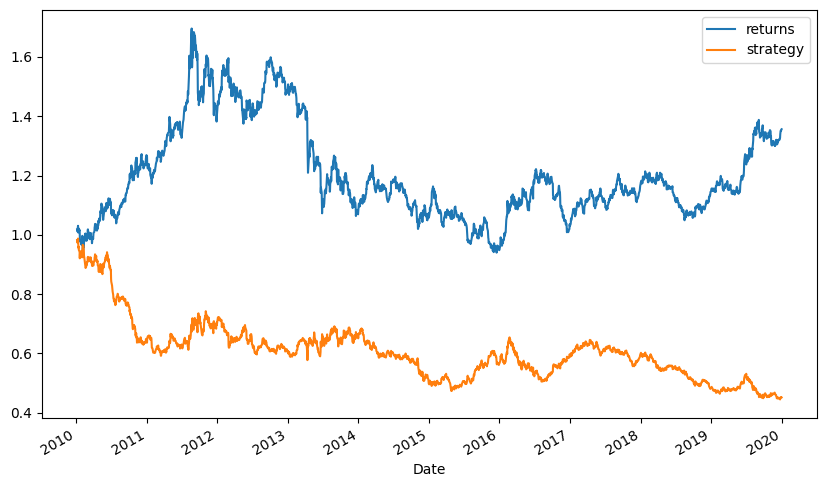

In [9]:
# Momentum Time Series Basic Strategy
# most simple is to buy stock if last return was positive and sell if it was negative

data["position"] = np.sign(data["returns"]) # -1 to short, 1 to long based on return compared to prev day
data["strategy"] = data["position"].shift(1) * data["returns"] # returns based on new strategy defined above
data[["returns", "strategy"]].dropna().cumsum().apply(np.exp).plot(figsize=(10,6)) # plot cumulative sum of returns for benchmark and strat

In [10]:
# above clearly is a shit strategy lol

<Axes: xlabel='Date'>

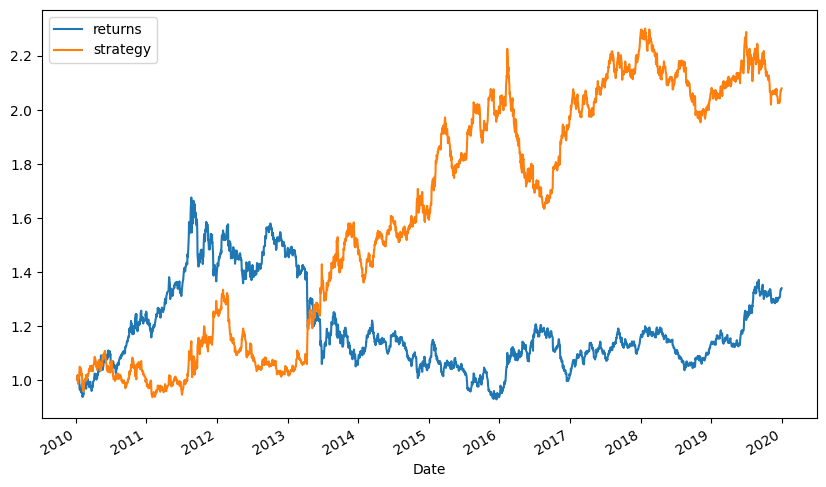

In [13]:
# Update to use a rolling 3 day mean to determine if positive or negative momentum
data["position"] = np.sign(data["returns"].rolling(3).mean())
data["strategy"] = data["position"].shift(1) * data["returns"]
data[["returns", "strategy"]].dropna().cumsum().apply(np.exp).plot(figsize=(10,6))

In [ ]:
# the amount of time is very important.  Above with 2 day instead of 3 is alot worse

<Axes: xlabel='Date'>

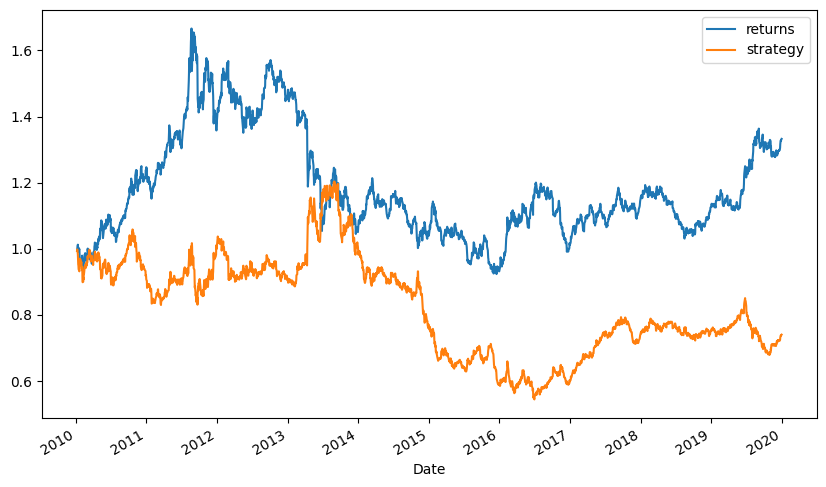

In [14]:
# Update to use a rolling 3 day mean to determine if positive or negative momentum
data["position"] = np.sign(data["returns"].rolling(2).mean())
data["strategy"] = data["position"].shift(1) * data["returns"]
data[["returns", "strategy"]].dropna().cumsum().apply(np.exp).plot(figsize=(10,6))

In [16]:
# This strategy can also be applied to trading within the same day, below is using AAPL data where momentum is based on different
# numbers of periods within the same day
fn = "./data/AAPL_1min_05052020.csv"
# fn = "./data/SPX_1min_05052020.csv"

data = pd.read_csv(fn, index_col=0, parse_dates=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 241 entries, 2020-05-05 16:00:00 to 2020-05-05 20:00:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HIGH    241 non-null    float64
 1   LOW     241 non-null    float64
 2   OPEN    241 non-null    float64
 3   CLOSE   241 non-null    float64
 4   COUNT   241 non-null    float64
 5   VOLUME  241 non-null    float64
dtypes: float64(6)
memory usage: 13.2 KB


In [18]:
# Create benchmark of minute by minute return
data["returns"] = np.log(data["CLOSE"] / data["CLOSE"].shift(1))

In [19]:
to_plot = ["returns"]

In [20]:
for m in [1, 3, 5, 7, 9]:
    data[f"position_{m}"] = np.sign(data["returns"].rolling(m).mean())
    data[f"strategy_{m}"] = data[f"position_{m}"].shift(1) * data["returns"]
    to_plot.append(f"strategy_{m}")

<Axes: title={'center': 'AAPL Intraday 05-05-2020'}, xlabel='Date'>

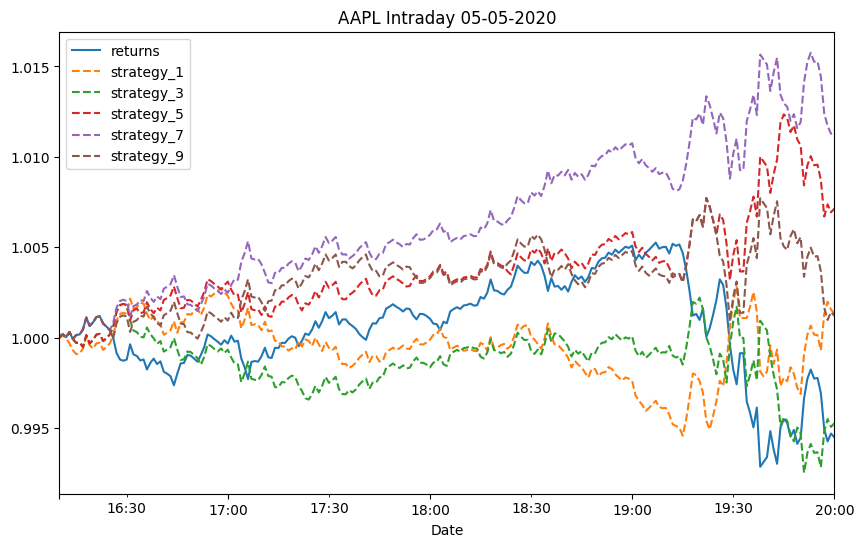

In [21]:
data[to_plot].dropna().cumsum().apply(np.exp).plot(title="AAPL Intraday 05-05-2020", figsize=(10,6), style=["-", "--", "--", "--", "--", "--",])

In [22]:
# Same but for S&P 500 Index
fn = "./data/SPX_1min_05052020.csv"

data = pd.read_csv(fn, index_col=0, parse_dates=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 241 entries, 2020-05-05 16:00:00 to 2020-05-05 20:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HIGH    241 non-null    float64
 1   LOW     241 non-null    float64
 2   OPEN    241 non-null    float64
 3   CLOSE   241 non-null    float64
 4   COUNT   241 non-null    float64
dtypes: float64(5)
memory usage: 11.3 KB


In [23]:
# Create benchmark of minute by minute return
data["returns"] = np.log(data["CLOSE"] / data["CLOSE"].shift(1))

In [24]:
to_plot = ["returns"]

In [25]:
for m in [1, 3, 5, 7, 9]:
    data[f"position_{m}"] = np.sign(data["returns"].rolling(m).mean())
    data[f"strategy_{m}"] = data[f"position_{m}"].shift(1) * data["returns"]
    to_plot.append(f"strategy_{m}")

<Axes: title={'center': 'S&P 500 Intraday 05-05-2020'}, xlabel='Date'>

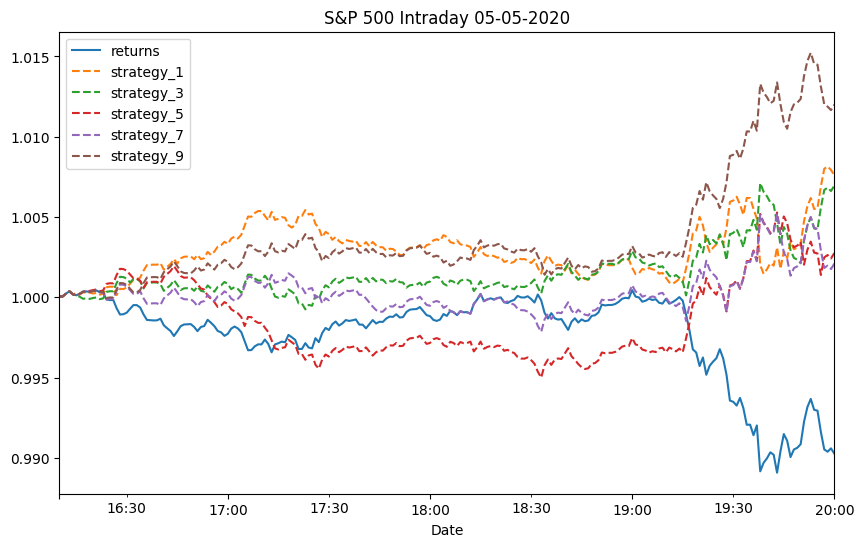

In [26]:
data[to_plot].dropna().cumsum().apply(np.exp).plot(title="S&P 500 Intraday 05-05-2020", figsize=(10,6), style=["-", "--", "--", "--", "--", "--",])